In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xauusd-gold-price-historical-data-2004-2024/XAU_1w_data.csv
/kaggle/input/xauusd-gold-price-historical-data-2004-2024/XAU_5m_data.csv
/kaggle/input/xauusd-gold-price-historical-data-2004-2024/XAU_15m_data.csv
/kaggle/input/xauusd-gold-price-historical-data-2004-2024/XAU_30m_data.csv
/kaggle/input/xauusd-gold-price-historical-data-2004-2024/XAU_4h_data.csv
/kaggle/input/xauusd-gold-price-historical-data-2004-2024/XAU_1d_data.csv
/kaggle/input/xauusd-gold-price-historical-data-2004-2024/XAU_1Month_data.csv
/kaggle/input/xauusd-gold-price-historical-data-2004-2024/XAU_1h_data.csv
/kaggle/input/stock-market-data/15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv


In [2]:
import torch
from torch import nn
from torch import optim as optim
data = pd.read_csv("/kaggle/input/stock-market-data/15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv")
data.head(10)

,Date,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
0,2010-01-04,6.440330,6.6950,15.609805,23.254051,0.423884,6.455075,6.8305,15.678546,23.366752,...,6.422875,6.8125,15.614786,23.006108,0.424342,493729600,151998000,78169752,38409100,800204000
1,2010-01-05,6.451465,6.7345,15.541064,23.261557,0.430073,6.487878,6.7740,15.636953,23.366746,...,6.458086,6.6715,15.620515,23.178910,0.422279,601904800,177038000,120067812,49749600,728648000
2,2010-01-06,6.348847,6.6125,15.149294,23.118809,0.432824,6.477046,6.7365,15.587638,23.351725,...,6.451466,6.7300,15.587638,23.201455,0.429844,552160000,143576000,158988852,58182400,649168000
3,2010-01-07,6.337109,6.5000,14.796624,22.878376,0.424342,6.379842,6.6160,15.192630,23.066212,...,6.372319,6.6005,15.177685,23.013616,0.430532,477131200,220604000,256315428,50559700,547792000
4,2010-01-08,6.379242,6.6760,14.993881,23.036165,0.425259,6.379844,6.6840,15.024515,23.201460,...,6.328685,6.5280,14.744323,22.750656,0.420903,447610800,196610000,188783028,51197400,478168000
5,2010-01-11,6.322966,6.5155,14.971216,22.743141,0.419299,6.409936,6.6400,15.054651,23.111299,...,6.403917,6.6310,15.054651,23.073731,0.427552,462229600,175588000,288227484,68754700,556612000
6,2010-01-12,6.251042,6.3675,14.706467,22.592865,0.405085,6.312735,6.4910,14.897744,22.840808,...,6.295280,6.4495,14.885042,22.652972,0.413109,594459600,181926000,193937868,65912100,627432000
7,2010-01-13,6.339215,6.4555,14.622035,22.803244,0.410587,6.347641,6.4855,14.654163,22.930972,...,6.255556,6.3950,14.358032,22.735623,0.407836,605892000,214464000,259604136,51863500,508868000
8,2010-01-14,6.302503,6.3675,14.690776,23.261557,0.404168,6.333499,6.5190,14.799117,23.366746,...,6.322967,6.4570,14.542585,22.773184,0.405544,432894000,195498000,169434396,63228100,608524000
9,2010-01-15,6.197175,6.3570,14.445452,23.186430,0.392247,6.367806,6.4825,14.783176,23.471939,...,6.347642,6.4590,14.777696,23.351725,0.401188,594067600,307530000,217162620,79913200,818192000


In [3]:
data.describe()

,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,High_NVDA,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,...,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03,3.774000e+03,3.774000e+03,3.774000e+03,3.774000e+03
mean,67.521690,71.444840,61.149777,129.578311,13.977600,68.176227,72.272163,61.762884,130.770886,14.231440,...,67.465510,71.459697,61.128255,129.547155,13.979288,2.299200e+08,8.321625e+07,5.617230e+07,3.616344e+07,4.969955e+08
std,65.602673,61.124111,46.638356,124.987871,28.088261,66.212381,61.843003,47.144306,126.104839,28.610675,...,65.523836,61.149296,46.612714,124.977587,28.117355,2.180726e+08,5.168606e+07,4.749974e+07,2.085042e+07,3.064756e+08
min,5.779478,5.430500,10.860739,17.447613,0.203574,5.898345,5.564500,11.015403,17.682676,0.207472,...,5.789105,5.296500,10.916527,17.508276,0.199906,2.323470e+07,1.500750e+07,9.312000e+06,7.164500e+06,4.564400e+07
25%,17.461680,14.987375,22.581480,28.772202,0.411332,17.645443,15.183750,22.738201,28.981824,0.418210,...,17.465271,15.000000,22.600904,28.766031,0.412650,8.492275e+07,5.234320e+07,2.733450e+07,2.262030e+07,3.034280e+08
50%,35.323715,48.394751,47.151819,64.985474,3.544295,35.728738,48.818001,47.410334,65.429323,3.594330,...,35.354713,48.577499,47.140873,64.852778,3.515616,1.403920e+08,7.007700e+07,3.768900e+07,3.022110e+07,4.283440e+08
75%,126.909601,120.965000,93.473120,228.535389,13.567127,127.999184,122.692247,94.761573,231.254503,13.823134,...,126.339104,120.822123,93.317730,228.850363,13.597044,3.081386e+08,9.872150e+07,7.315977e+07,4.420790e+07,6.025145e+08
max,258.735504,232.929993,196.433777,464.854340,148.856064,259.814335,233.000000,201.188288,465.639777,152.865409,...,257.906429,232.389999,197.023087,464.297590,149.325985,1.880998e+09,8.484220e+08,5.923990e+08,3.193179e+08,3.692928e+09


In [4]:
data.isnull().sum()


Date            0
Close_AAPL      0
Close_AMZN      0
Close_GOOGL     0
Close_MSFT      0
Close_NVDA      0
High_AAPL       0
High_AMZN       0
High_GOOGL      0
High_MSFT       0
High_NVDA       0
Low_AAPL        0
Low_AMZN        0
Low_GOOGL       0
Low_MSFT        0
Low_NVDA        0
Open_AAPL       0
Open_AMZN       0
Open_GOOGL      0
Open_MSFT       0
Open_NVDA       0
Volume_AAPL     0
Volume_AMZN     0
Volume_GOOGL    0
Volume_MSFT     0
Volume_NVDA     0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index("Date")
data

,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,High_NVDA,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.440330,6.695000,15.609805,23.254051,0.423884,6.455075,6.830500,15.678546,23.366752,0.426864,...,6.422875,6.812500,15.614786,23.006108,0.424342,493729600,151998000,78169752,38409100,800204000
2010-01-05,6.451465,6.734500,15.541064,23.261557,0.430073,6.487878,6.774000,15.636953,23.366746,0.434658,...,6.458086,6.671500,15.620515,23.178910,0.422279,601904800,177038000,120067812,49749600,728648000
2010-01-06,6.348847,6.612500,15.149294,23.118809,0.432824,6.477046,6.736500,15.587638,23.351725,0.433741,...,6.451466,6.730000,15.587638,23.201455,0.429844,552160000,143576000,158988852,58182400,649168000
2010-01-07,6.337109,6.500000,14.796624,22.878376,0.424342,6.379842,6.616000,15.192630,23.066212,0.432366,...,6.372319,6.600500,15.177685,23.013616,0.430532,477131200,220604000,256315428,50559700,547792000
2010-01-08,6.379242,6.676000,14.993881,23.036165,0.425259,6.379844,6.684000,15.024515,23.201460,0.428239,...,6.328685,6.528000,14.744323,22.750656,0.420903,447610800,196610000,188783028,51197400,478168000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,257.916443,229.050003,195.884399,438.450836,140.207108,257.926411,229.139999,195.884399,438.720315,141.886946,...,255.209412,226.940002,194.615856,433.780209,139.987127,23234700,15007500,10403300,7164500,105157000
2024-12-26,258.735504,227.050003,195.375000,437.233276,139.917130,259.814335,228.500000,196.523671,440.057630,140.837058,...,257.906429,228.500000,194.925505,438.201337,139.687155,27237100,16146700,12046600,8194200,116205600
2024-12-27,255.309296,223.750000,192.538254,429.668457,136.997391,258.415896,226.029999,195.095322,434.349074,139.007216,...,257.546826,225.600006,194.725737,433.730320,138.537258,42355300,27367100,18891400,18117700,170582600


In [7]:
data_nvda = data[["Open_NVDA","Close_NVDA","High_NVDA","Low_NVDA"]]

data_nvda.head(5)

,Open_NVDA,Close_NVDA,High_NVDA,Low_NVDA
Date,,,,
2010-01-04,0.424342,0.423884,0.426864,0.415172
2010-01-05,0.422279,0.430073,0.434658,0.422279
2010-01-06,0.429844,0.432824,0.433741,0.425718
2010-01-07,0.430532,0.424342,0.432366,0.421133
2010-01-08,0.420903,0.425259,0.428239,0.418382


In [8]:
data_nvda.describe()

,Open_NVDA,Close_NVDA,High_NVDA,Low_NVDA
count,3774.000000,3774.000000,3774.000000,3774.000000
mean,13.979288,13.977600,14.231440,13.701438
std,28.117355,28.088261,28.610675,27.532272
min,0.199906,0.203574,0.207472,0.198301
25%,0.412650,0.411332,0.418210,0.403137
50%,3.515616,3.544295,3.594330,3.449628
75%,13.597044,13.567127,13.823134,13.332437
max,149.325985,148.856064,152.865409,146.236457


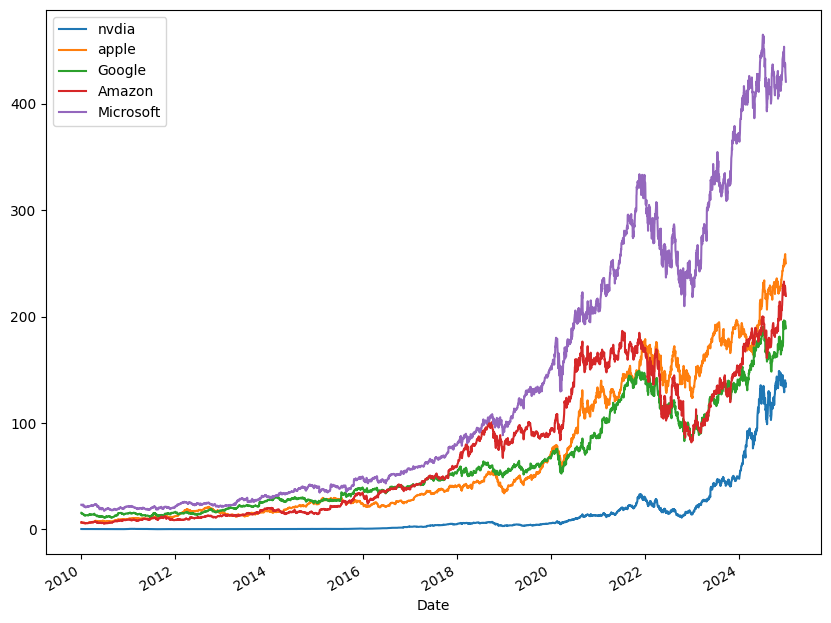

In [9]:
plt.figure(figsize=(10,8))
data_nvda["Close_NVDA"].plot(label="nvdia")
data["Close_AAPL"].plot(label="apple")
data["Close_GOOGL"].plot(label="Google")
data["Close_AMZN"].plot(label="Amazon")
data["Close_MSFT"].plot(label="Microsoft")
plt.legend()


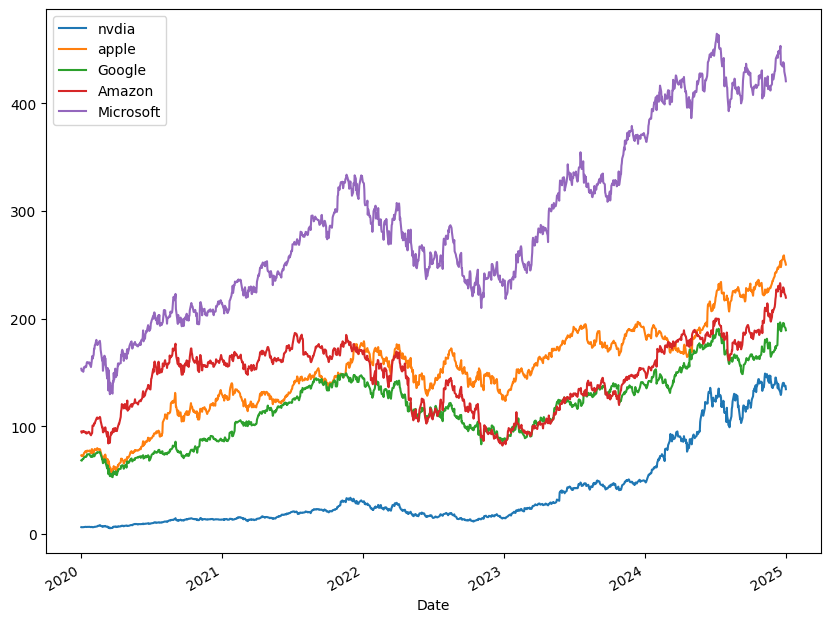

In [10]:
plt.figure(figsize=(10,8))
data_nvda["Close_NVDA"].loc["2020":].plot(label="nvdia")
data["Close_AAPL"].loc["2020":].plot(label="apple")
data["Close_GOOGL"].loc["2020":].plot(label="Google")
data["Close_AMZN"].loc["2020":].plot(label="Amazon")
data["Close_MSFT"].loc["2020":].plot(label="Microsoft")
plt.legend()

<Axes: >

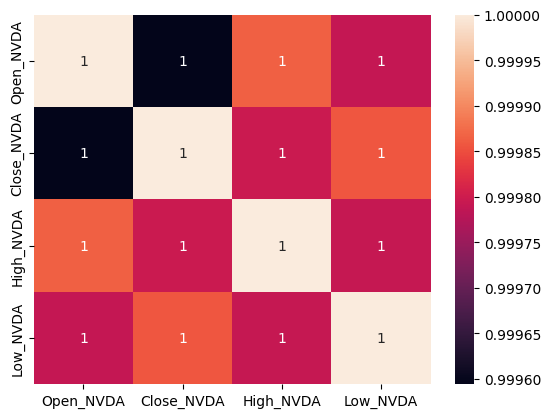

In [11]:
import seaborn as sb
sb.heatmap(data_nvda.corr(),annot=True)

<Axes: xlabel='Date'>

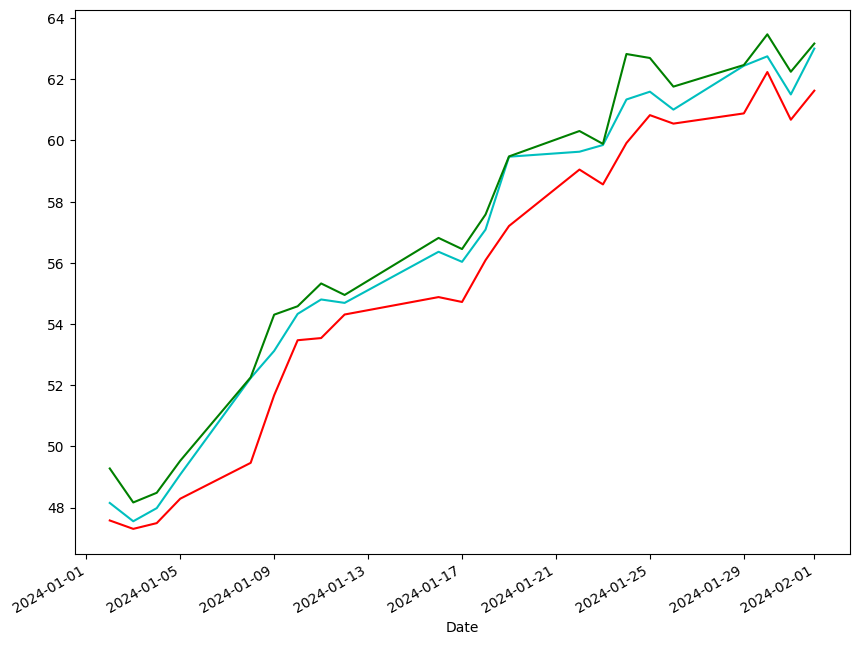

In [12]:
plt.figure(figsize=(10,8))
data_nvda["Close_NVDA"].loc["2024-01-01":"2024-02-01"].plot(c="c",label="close")
data_nvda["High_NVDA"].loc["2024-01-01":"2024-02-01"].plot(c="g",label='high')
data_nvda["Low_NVDA"].loc["2024-01-01":"2024-02-01"].plot(c="r",label="low")


In [13]:
# data_nvda["day"] = data.index.day
# data_nvda["month"] = data.index.month
# data_nvda["year"] = data.index.year
# data_nvda

In [14]:
x_train =torch.tensor(data_nvda.loc["2010-04-01":"2021-12-01"].values,dtype=torch.float32)
y_train =torch.tensor( data_nvda.loc["2010-04-02":"2021-12-02"].values,dtype=torch.float32)

x_test = torch.tensor(data_nvda.loc["2021-12-01":"2022-12-01"].values,dtype=torch.float32)
y_test = torch.tensor(data_nvda.loc["2021-12-02":"2022-12-02"].values,dtype=torch.float32)
y_test

tensor([[31.1593, 32.0697, 32.4211, 30.9706],
        [31.9439, 30.6392, 32.0727, 30.0772],
        [29.8276, 29.9844, 30.1880, 27.9889],
        ...,
        [15.6841, 16.9091, 16.9161, 15.5842],
        [16.9851, 17.1210, 17.2509, 16.6214],
        [16.6454, 16.8622, 16.9191, 16.4315]])

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
y_train=scaler.fit_transform(y_train)
x_test=scaler.fit_transform(x_test)
y_test=scaler.fit_transform(x_test)
#data_nvda["Volume_NVDA"] = np.log10(data_nvda["Volume_NVDA"])
x_train =torch.tensor(x_train,dtype=torch.float32)
y_train =torch.tensor(y_train ,dtype=torch.float32)

x_test = torch.tensor(x_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)
x_test

tensor([[1.0000, 0.9532, 1.0000, 0.9980],
        [0.9098, 0.9858, 0.9624, 0.9808],
        [0.9452, 0.9182, 0.9462, 0.9373],
        ...,
        [0.2185, 0.2083, 0.1949, 0.2286],
        [0.2128, 0.2692, 0.2415, 0.2326],
        [0.2714, 0.2792, 0.2570, 0.2830]])

In [16]:
import torch
import torch.nn as nn

class RecNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RecNetwork, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
           
        )
        self.fc = nn.LazyLinear(output_size)

    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)  # out: [batch, seq_len, hidden]
        last_time_step = out.unsqueeze(2)[:,-1]  # Use the output from the last time step
        out = self.fc(last_time_step)
        
        return out
    
def train_loop(dataset,model,loss,optm):
    arr_loss= []
    size=len(dataset)
    for batch,(x,y) in enumerate(dataset):

        pred = model(x)
        l = loss(pred,y)
        optm.zero_grad()
        l.backward()
        optm.step()
        if(batch%10==0):
            print(f"batch:{batch}/{size}==============loss={l.item():.6f}")
    return l.item()
def test_loop(dataset,model,loss):
    size = len(dataset)
    arr_loss=[]
    for batch,(x,y) in enumerate(dataset):
        with torch.no_grad():
            pred = model(x)
            l = loss(pred,y)
            if(batch%10==0):

                print(f"batch:{batch}/{size}==============loss={l.item():.6f}")
    return l.item()
                
        


In [17]:
from torch.utils.data import TensorDataset, DataLoader

# Create dataset
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=8)

===================epoch:1=====================
===================train=====================
batch:0/184==============loss=0.196211
batch:10/184==============loss=0.173421
batch:20/184==============loss=0.154950
batch:30/184==============loss=0.139349
batch:40/184==============loss=0.124848
batch:50/184==============loss=0.113216
batch:60/184==============loss=0.102571
batch:70/184==============loss=0.093155
batch:80/184==============loss=0.084497
batch:90/184==============loss=0.079028
batch:100/184==============loss=0.079886
batch:110/184==============loss=0.084406
batch:120/184==============loss=0.115209
batch:130/184==============loss=0.123228
batch:140/184==============loss=0.075385
batch:150/184==============loss=0.079083
batch:160/184==============loss=0.138123
batch:170/184==============loss=0.223056
batch:180/184==============loss=0.422476
===================test=====================
batch:0/32==============loss=0.829737
batch:10/32==============loss=0.528362
batch:20/32=====

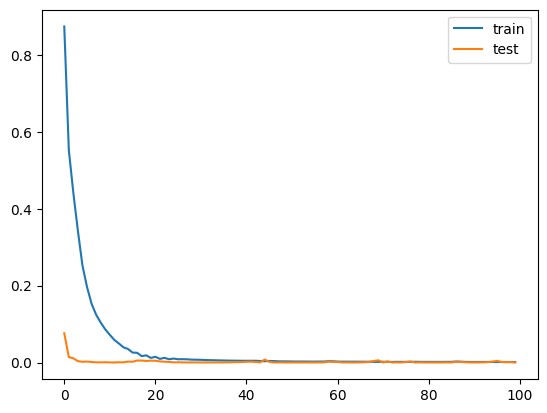

In [18]:
epochs= 100
loss = nn.MSELoss()
model = RecNetwork(x_train.shape[1],x_train.shape[1],y_train.shape[1],2)
opt = optim.Adam(model.parameters(), lr=0.002)
train_arr =[]
test_arr =[]
for e in range(epochs):
    print(f"===================epoch:{e+1}=====================")
    print(f"===================train=====================")
    train_arr.append(train_loop(train_loader,model,loss,opt))
    print(f"===================test=====================")
    test_arr.append(test_loop(test_loader,model,loss))
with torch.no_grad():
    plt.plot(train_arr,label="train")
    plt.plot(test_arr,label="test")
    plt.legend()
    tr = train_arr[-1]
    te = test_arr[-1]
    print(f"overfitting with {abs(tr-te)}")

overfitting with 0.0010162000980926678


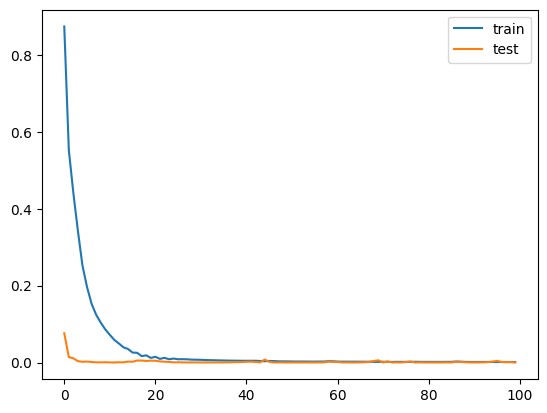

In [19]:
with torch.no_grad():
    plt.plot(train_arr,label="train")
    plt.plot(test_arr,label="test")
    plt.legend()
    tr = train_arr[-1]
    te = test_arr[-1]
    print(f"overfitting with {abs(tr-te)}")

In [20]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name)
        print(param.data)

lstm.weight_ih_l0
tensor([[ 0.8837,  0.9889,  0.1182,  0.8555],
        [ 0.3375,  0.1562,  0.6746,  0.4139],
        [ 0.7281,  1.0180,  0.7475,  0.3332],
        [ 0.2026,  0.7230,  1.0479,  0.6174],
        [ 0.3331, -0.0155, -0.0573,  0.7541],
        [-0.8799, -0.8481, -0.2858, -0.2325],
        [-0.1957, -0.5217, -0.2848, -0.4603],
        [ 1.0417,  1.0342,  0.4111,  1.0694],
        [ 0.4857,  0.5097,  0.4558,  0.7769],
        [ 0.1982, -0.2961, -0.6906,  0.0062],
        [-0.6883, -0.5619, -0.4132, -0.5929],
        [ 1.9505,  1.5228,  1.6523,  2.1409],
        [ 0.9475,  0.6458,  0.9620,  1.0971],
        [ 0.1586,  0.9195, -0.0028,  0.7806],
        [ 0.4753,  0.3798,  0.7650,  0.5757],
        [ 0.9357,  1.0942,  1.7800,  0.9776]])
lstm.weight_hh_l0
tensor([[-0.7155, -0.5782, -0.0131, -0.0907],
        [ 0.1907, -0.9558, -0.9837,  0.4848],
        [ 0.5010,  0.1996, -0.9837,  0.6646],
        [-0.7005,  0.2332,  0.3290, -0.5094],
        [-0.1684,  0.1533,  0.1004, -0.1237

In [21]:
#	Open_NVDA	Close_NVDA	High_NVDA	Low_NVDA	Volume_NVDA

torch.Size([3773, 4])
torch.Size([3773, 4])
tensor(0.0043)


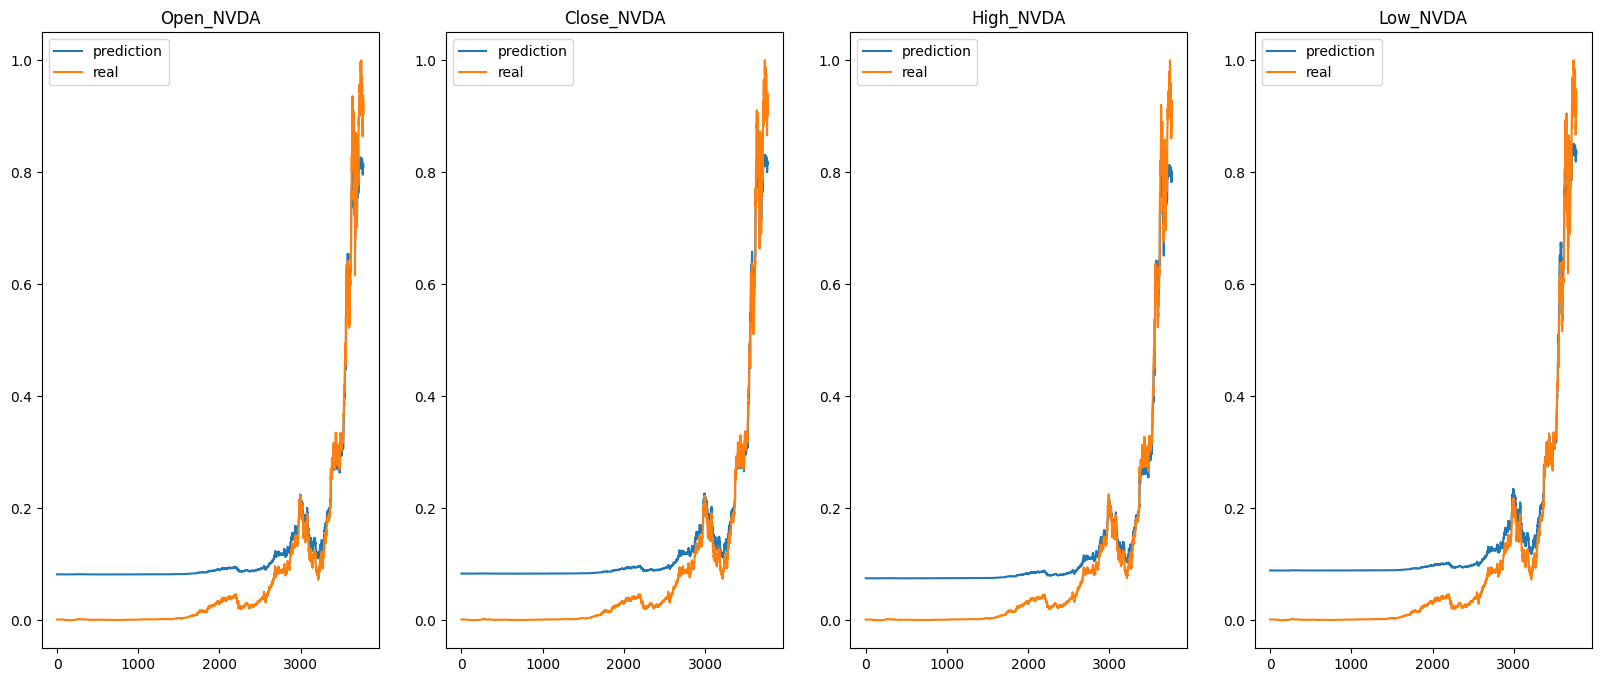

In [22]:
def predict(data):
    x_val =torch.tensor(data[:-1].values,dtype=torch.float32)
    y_val =torch.tensor(data[1:].values,dtype=torch.float32)
    x_val=scaler.fit_transform(x_val)
    y_val=scaler.fit_transform(y_val)
    x_val =torch.tensor(x_val,dtype=torch.float32)
    y_val =torch.tensor(y_val,dtype=torch.float32)

    pred_lst =[]
    loss = nn.MSELoss()
    with torch.no_grad():
        for x in x_val:
            
            pred = model(x.unsqueeze(0))
            pred_lst.append(pred.squeeze())
        pred_lst = np.array(pred_lst)
        pred_lst = torch.from_numpy(pred_lst)
    print(pred_lst.shape)
    print(y_val.shape)
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    plt.title("Open_NVDA")
    plt.plot(pred_lst[:,0],label='prediction')
    plt.plot(y_val[:,0],label="real")
    plt.legend()
    plt.subplot(1,4,2)
    plt.title("Close_NVDA")
    plt.plot(pred_lst[:,1],label='prediction')
    plt.plot(y_val[:,1],label="real")
    plt.legend()
    plt.subplot(1,4,3)
    plt.title("High_NVDA")
    plt.plot(pred_lst[:,2],label='prediction')
    plt.plot(y_val[:,2],label="real")
    plt.legend()
    plt.subplot(1,4,4)
    plt.title("Low_NVDA")
    plt.plot(pred_lst[:,3],label='prediction')
    plt.plot(y_val[:,3],label="real")
    plt.legend()
    print(loss(y_val,pred_lst))
predict(data_nvda)

torch.Size([3773, 4])
torch.Size([3773, 4])
tensor(0.0016)


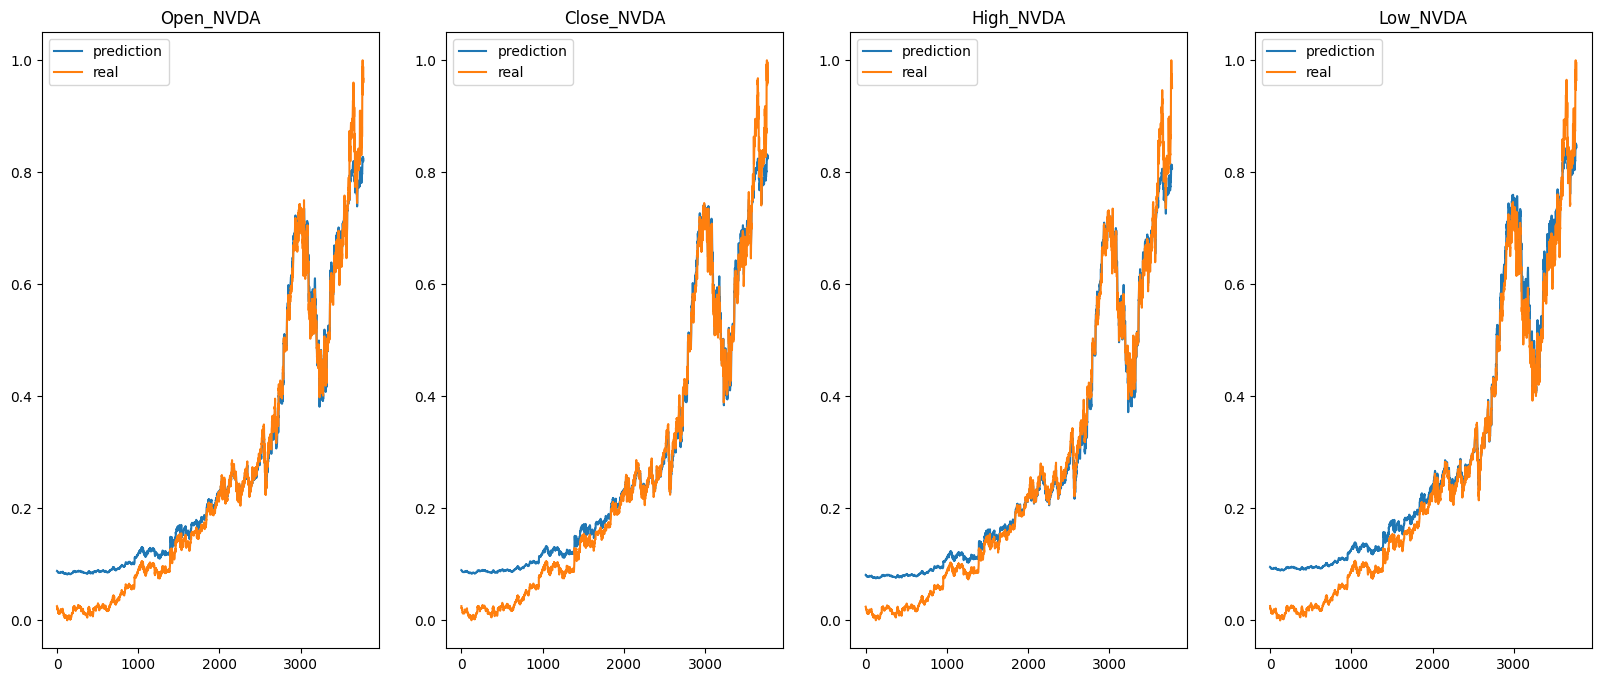

In [23]:
data
data_google = data[["Open_GOOGL","Close_GOOGL","High_GOOGL","Low_GOOGL"]]
predict(data_google)

torch.Size([3773, 4])
torch.Size([3773, 4])
tensor(0.0027)


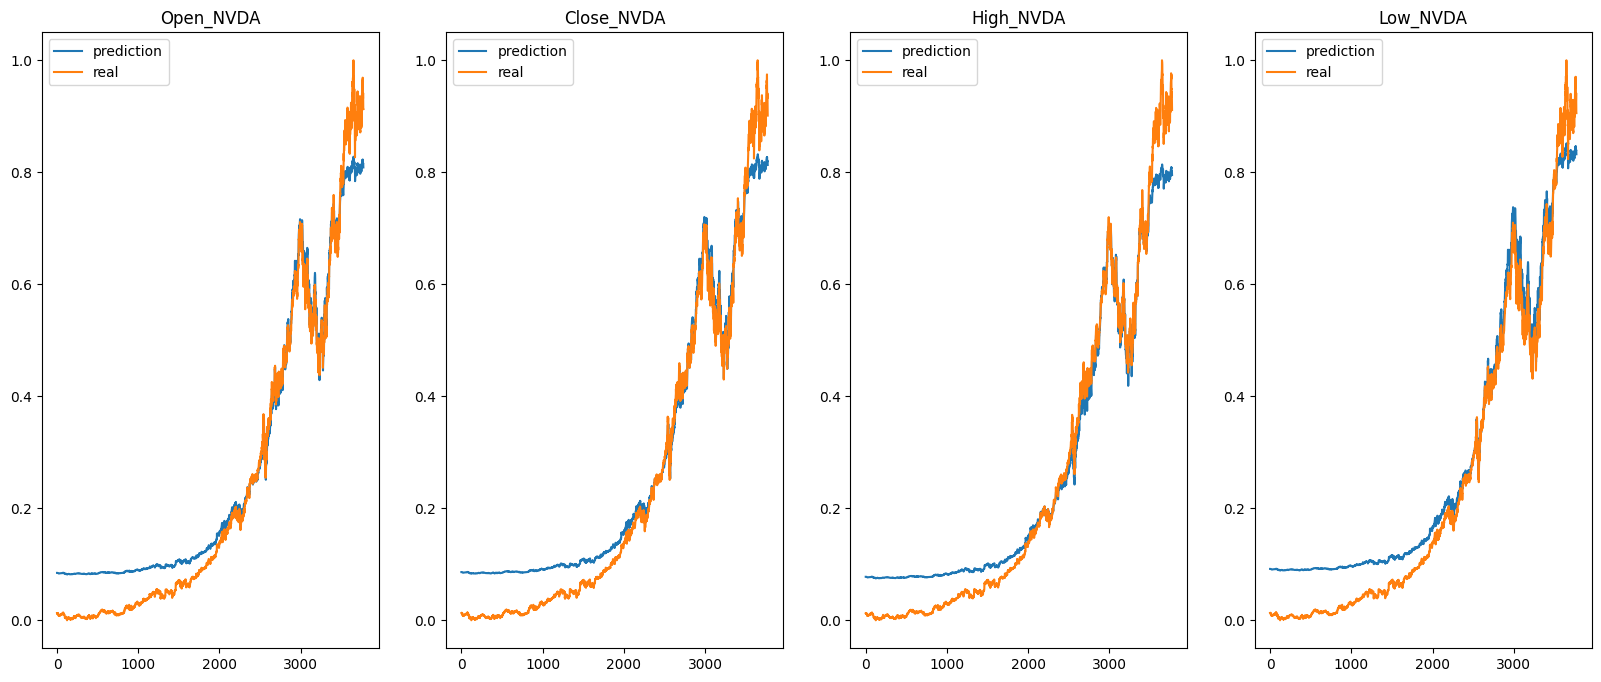

In [24]:
data_google = data[["Open_MSFT","Close_MSFT","High_MSFT","Low_MSFT"]]
predict(data_google)

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("novandraanugrah/xauusd-gold-price-historical-data-2004-2024")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/xauusd-gold-price-historical-data-2004-2024


In [26]:
gold = pd.read_csv("/kaggle/input/xauusd-gold-price-historical-data-2004-2024/XAU_1h_data.csv",sep=";")
gold =gold.dropna()
gold.describe()

,Open,High,Low,Close,Volume
count,119795.000000,119795.000000,119795.000000,119795.000000,119795.000000
mean,1324.728013,1326.501819,1322.898237,1324.735518,3395.905981
std,500.728711,501.293892,500.131827,500.741637,3975.487430
min,381.300000,382.000000,381.100000,381.800000,1.000000
25%,998.375000,999.930000,996.370000,998.320000,716.000000
50%,1290.250000,1291.670000,1288.800000,1290.250000,2428.000000
75%,1710.425000,1712.655000,1707.935000,1710.475000,4621.000000
max,2812.340000,2817.230000,2808.260000,2812.380000,104205.000000


In [27]:
df = gold[["Open","Close","High","Low","Date"]].set_index("Date")
df

,Open,Close,High,Low
Date,,,,
2004.06.11 07:00,384.00,383.80,384.30,383.30
2004.06.11 08:00,383.80,383.10,384.30,383.10
2004.06.11 09:00,383.10,383.10,384.10,382.80
2004.06.11 10:00,383.00,383.60,383.80,383.00
2004.06.11 11:00,383.60,383.60,383.80,383.50
...,...,...,...,...
2025.01.31 20:00,2808.75,2798.91,2808.91,2795.31
2025.01.31 21:00,2799.01,2796.30,2802.86,2795.54
2025.01.31 22:00,2796.24,2800.88,2802.10,2794.34


torch.Size([119794, 4])
torch.Size([119794, 4])
tensor(0.0010)


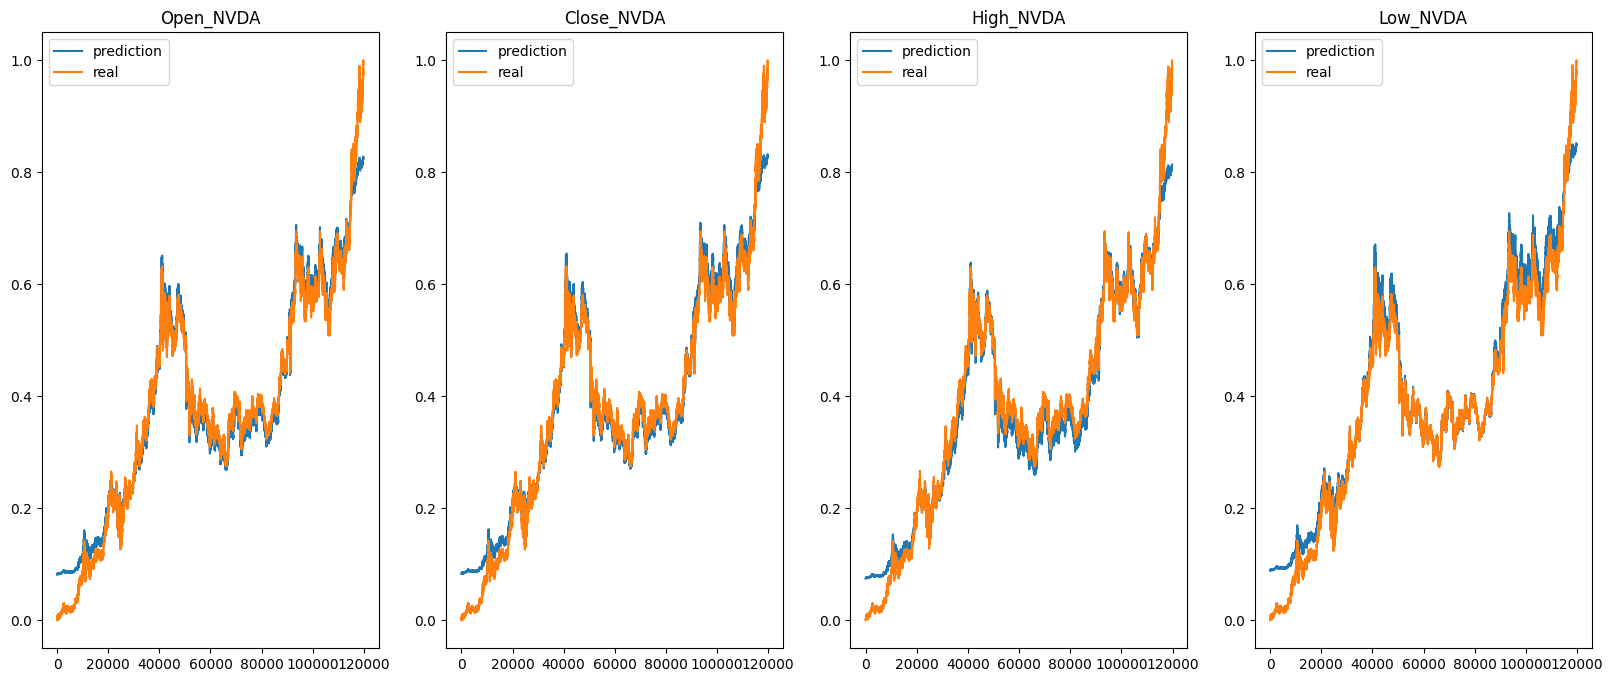

In [28]:
predict(df)